### Image segmentation using Morphological operations

If we want to extract or define something from the rest of the image, eg. detecting an object from a background, we can break the image up into segments in which we can do more processing on. This is typically called Segmentation. Morphological operations are some simple operations based on the image shape. It is normally performed on binary images. Two basic morphological operators are Erosion and Dilation. For basic understanding about Dilation and Erosion, refer this article. In order to process on we’ll use OTSU’s threshold algorithm where this removes over segmented result due to noise or any other irregularities in the image and implement with OpenCV.

<b>Approach:</b>

 - Label the region which we are sure of being the foreground or object with one color (or intensity), Label the region which we are sure of being background or non-object with another color.
 - Finally the region which we are not sure of anything, label it with 0. That is our marker. Then apply watershed algorithm.
 - Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

Let’s start with an example, consider coins image. Input Image:

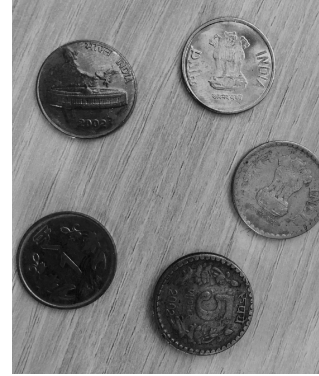

In [18]:
import cv2
import numpy as np

In [19]:
# image processing using threshold technique
image = cv2.imread("coin-detection.jpg", 0)

ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cv2.imshow("image", image)
cv2.imshow("thresh", thresh)

cv2.waitKey()
cv2.destroyAllWindows()

This output shows that image is transformed by thresholding operation where foreground still contains some noises. Now, we need to remove any small white noises in the image i.e. foreground. For that we can use morphological closing. To remove any small holes in the foreground object, we can use morphological closing. To obtain background we dilate the image. Dilation increases object boundary to background.

In [21]:
# image processing using threshold technique
image = cv2.imread("coin-detection.jpg", 0)

ret, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cv2.imshow("image", image)

# Noise removal using Morphological closing operation 
kernel = np.ones((3, 3), np.uint8) 
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 2) 
  
# Background area using Dilation 
bg = cv2.dilate(closing, kernel, iterations = 1) 
  
# Finding foreground area 
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0) 
ret, fg = cv2.threshold(dist_transform, 0.02 * dist_transform.max(), 255, 0) 
  
cv2.imshow('image', fg)

cv2.waitKey()
cv2.destroyAllWindows()